In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdflimeConfig import dataLocation
import os

df = pd.read_json(os.path.join(dataLocation, "user-study/surveyFinal.json"))

# Said in comments that some answers are not faithful due to time
df = df.drop(index=18)

len(df)

22

### Demographic data
G1Q00001 - AI experience <br>
G1Q00002 - Academic degree <br>
G1Q00003 - Gender <br>
G1Q00004 - Age <br>
G2Q00001 - Data Mining <br>
G3Q00001 - KG

In [17]:
fig, axs = plt.subplots(3,2, figsize=(15,16))

sns.countplot(x=df["G1Q00001"], ax=axs[0][0])
sns.countplot(x=df["G1Q00002"], ax=axs[0][1])
sns.countplot(x=df["G1Q00003"], ax=axs[1][0])
sns.countplot(x=df["G1Q00004"], ax=axs[1][1])
sns.countplot(x=df["G2Q00001"], ax=axs[2][0])
sns.countplot(x=df["G3Q00001"], ax=axs[2][1])

plt.close()
#plt.show()

In [18]:
display(df.groupby(by="G1Q00001").count()["id"]/22)
display(df.groupby(by="G1Q00002").count()["id"]/22)
display(df.groupby(by="G1Q00003").count()["id"]/22)
display(df.groupby(by="G1Q00004").count()["id"]/22)
display(df.groupby(by="G2Q00001").count()["id"]/22)
display(df.groupby(by="G3Q00001").count()["id"]/22)

G1Q00001
Extensive experience    0.181818
No experience           0.181818
Some experience         0.590909
Name: id, dtype: float64

G1Q00002
Bachelor/Undergraduate    0.545455
Master/Graduate           0.409091
PhD                       0.045455
Name: id, dtype: float64

G1Q00003
Female    0.181818
Male      0.818182
Name: id, dtype: float64

G1Q00004
18 - 24 years    0.727273
25 - 34 years    0.227273
45 - 54 years    0.045455
Name: id, dtype: float64

G2Q00001
No     0.272727
Yes    0.727273
Name: id, dtype: float64

G3Q00001
No     0.454545
Yes    0.545455
Name: id, dtype: float64

### Classifier Trust

#### Movies

In [119]:
d["change"] = abs(d["after"] - d["bfore"])
d.corr()

,after,bfore,help,change
after,1.000000,0.342041,0.231597,-0.317509
bfore,0.342041,1.000000,0.145794,0.075819
help,0.231597,0.145794,1.000000,0.184055
change,-0.317509,0.075819,0.184055,1.000000


In [114]:
d.corr()

,after,bfore,help
after,1.000000,0.342041,0.231597
bfore,0.342041,1.000000,0.145794
help,0.231597,0.145794,1.000000


<AxesSubplot:xlabel='after', ylabel='bfore'>

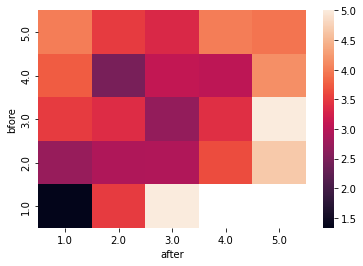

In [113]:
sns.heatmap(d.groupby(by=["bfore", "after"]).mean().reset_index().pivot("bfore", "after", "help").sort_index(ascending=False))

In [85]:
d.pivot(index="after", columns="bfore", values="help")

ValueError: Index contains duplicate entries, cannot reshape

In [80]:
d = d.set_index(['after', 'bfore', 'help'], append=True)

KeyError: "None of ['after', 'bfore', 'help'] are in the columns"

In [73]:
sns.load_dataset("flights")

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


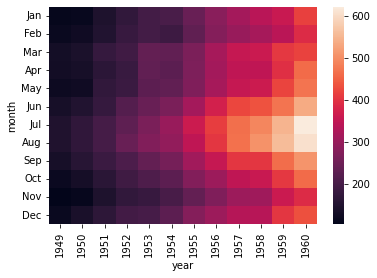

In [69]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

flights

In [67]:
d.pivot("bfore", "after", "help")

ValueError: Index contains duplicate entries, cannot reshape

In [63]:
d.corr()

sns.heatmap(d)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
sns.heatmap

In [169]:
d = pd.DataFrame()
output_table = pd.DataFrame()

movies = ["Chronicles of Narnia: Prince Caspian", "Shallow Grave", "Warm Water Under a Red Bridge", "BASEketball", "Testosterone", "Black Knight", "Hanging Up", "An American Carol", "The Human Resources Manager", "Slumdog Millionaire"]
movie_preds = [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
albums = ["Orphans: Brawlers, Bawlers & Bastards", "From Here We Go Sublime", "American Idiot", "Mic Tyson", "The Great Western", "Laulu laakson kukista", "Daybreak", "Love is Dead", "Sixes & Sevens", "GhostDeini The Great"]
album_preds = [1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

entity_type = "Album"
entities = movies if entity_type == "Movie" else albums
preds = movie_preds if entity_type == "Movie" else album_preds
start_group = 4 if entity_type == "Movie" else 6

def mean_std_rounded(series):
    return f"{round(series.mean(), 2):.2f} ({round(series.std(), 2):.2f})"

for entity_idx in range(1, 11):

    trust_before = df[f"G{start_group}Q00001[SQ0{entity_idx:02d}]"]
    trust_after =  df[f"G{start_group+1}Q00001[SQ0{entity_idx:02d}][1]"]
    explanation_helpful = df[f"G{start_group+1}Q00001[SQ0{entity_idx:02d}][2]"]

    for before, after, help in zip(trust_before, trust_after, explanation_helpful):
        d = d.append({"bfore": before, "after": after, "help": help}, ignore_index=True)

    row = {
        f"0{entity_type}": entities[entity_idx-1],
        f"1Prediction": "good" if preds[entity_idx-1] else "bad",
        "2Trust before": mean_std_rounded(trust_before),
        "3Trust after":  mean_std_rounded(trust_after),
        "4Absolute change": mean_std_rounded(abs(trust_before-trust_after)),
        "5Helpfulness": mean_std_rounded(explanation_helpful)
    }

    output_table = output_table.append(row, ignore_index=True)


### Last row - "How much do you trust the clf to make accurate predictions in the future"
overall_trust_before = df[f"G{start_group}Q00002"]
overall_trust_after = df[f"G{start_group+1}Q00002"]
row = {
    f"0{entity_type}": "Overall Trust",
    f"1Prediction": "---",
    "2Trust before": mean_std_rounded(overall_trust_before),
    "3Trust after":  mean_std_rounded(overall_trust_after),
    "4Absolute change": mean_std_rounded(abs(overall_trust_before-overall_trust_after)),
    "5Helpfulness": "---"
}
output_table = output_table.append(row, ignore_index=True)


print(output_table.to_latex(index=False))



\begin{tabular}{llllll}
\toprule
                                0Album & 1Prediction & 2Trust before & 3Trust after & 4Absolute change & 5Helpfulness \\
\midrule
 Orphans: Brawlers, Bawlers \& Bastards &        good &   3.09 (0.81) &  2.73 (1.12) &      0.91 (0.97) &  3.14 (1.28) \\
               From Here We Go Sublime &        good &   3.00 (0.87) &  2.95 (1.21) &      0.86 (0.89) &  3.18 (1.30) \\
                        American Idiot &         bad &   1.77 (1.07) &  2.36 (1.40) &      0.86 (0.83) &  2.82 (1.44) \\
                             Mic Tyson &        good &   2.50 (0.91) &  3.27 (1.08) &      0.95 (0.90) &  3.27 (1.03) \\
                     The Great Western &         bad &   3.14 (0.99) &  2.82 (0.96) &      0.59 (0.59) &  3.00 (1.27) \\
                 Laulu laakson kukista &        good &   2.50 (0.96) &  2.36 (1.14) &      0.77 (0.75) &  2.95 (1.17) \\
                              Daybreak &        good &   2.86 (0.99) &  3.32 (1.17) &      0.73 (0.70) &  3.14

#### Overall Trust

### Written feedback
G8Q00004 - To explanations <br>
G8Q00005 - In general

In [38]:
for x in df["G8Q00004"]:
    if x: print(x, end="\n\n")

It seems like positive predictions are easier to understand than negative ones. Sometimes it's a bit weird that, e.g., a movie/album is classified negative, while the majority of edges say "positive" (e.g., for Love Is Dead).

- some explanations where pretty much telling not a lot, e.g. that an album is bad because it is of type 'album', or because it is a 'thing'
- I think in order to get the most out of the graph explanations, one needs some attributes that you can relate to (e.g. like in the example, whether a movie won an award), or one needs some background knowledge in the field, like whether producer/writer X is associated with rather good or bad movies

For me as someone not really into knowledge graphs it was hard to understand based on the picture, why a prediction was considered good/bad (at a first glance)

The last music classifier should be rated 5 for the first rating (without explanations)

some categories in the graph don't make sense (seem unrelated) and might be bia

In [39]:
for x in df["G8Q00005"]:
    if x: print(x, end="\n\n")

Probably takes more than 15 min

Cool survey! Very good explained and guidance!

A back button would be useful

It felt pretty confusing at times that no "solutions" or results were given after the individual guessing rounds (Maybe I just missed them, idk). I think it would have been helpful to have feedback after each round to know how accurate one's own predictions were in order to be able to understand the classifier better.

